In [ ]:
l = 'AQUA, SODIUM LAURETH SULFATE, GLYCERIN, SODIUM CHLORIDE, COCAMIDOPROPYL BETAINE, PERFUME, GLYCERYL OLEATE, COCO-GLUCOSIDE, SODIUM BENZOATE, CITRIC ACID, MENTHOL, POTASSIUM SORBATE, HYDROXYPROPYL GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE, SODIUM HYDR OXIDES, MENTHA AQUATICA LEAF EXTRACT, TOCOPHEROL, HYDROGENATED PALM GLYCERIDES CITRATE, PROPYLENE GLYCOL'
l = l.split(',')
l2 = 'Aqua, Sodium Laureth Sulfate, Cocamidopropyl Betaine, Glycerin, Menthol, Menthyl Lactate, Tocopherol, Ascorbyl Palmitate, Parfum, Glyceryl Oleate, Urea, Coco-Glucoside, Starch Hydroxypropyltrimonium Chloride, Hydrogenated Palm Glycerides Citrate, Lecithin, Sodium Benzoate, Potassium Sorbate, Benzoic Acid, Linalool, Limonene, Geraniol, Sodium Chloride, Citric Acid, Sodium Hydroxide, Sodium Sulfate, Sodium Lactate, Lactic Acid'
l2 = l2.split(',')
for i in l2:
  if i.lower() not in [j.lower() for j in l]:
      print(i)

 Menthyl Lactate
 Ascorbyl Palmitate
 Parfum
 Urea
 Starch Hydroxypropyltrimonium Chloride
 Lecithin
 Benzoic Acid
 Linalool
 Limonene
 Geraniol
 Sodium Hydroxide
 Sodium Sulfate
 Sodium Lactate
 Lactic Acid


x_train shape: (60000, 28, 28)  y_train shape: (60000,)
x_test shape: (10000, 28, 28)  y_test shape: (10000,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 28, 28)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 14, 14)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 64, 14, 14)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 14, 14)        8224      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 7, 7)         0         
 g2D)                                                            
          

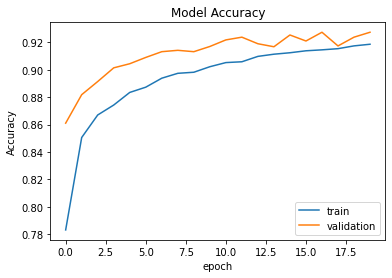

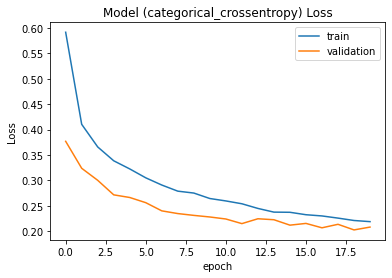


 Test accuracy: 0.9193999767303467


In [ ]:
from keras.datasets import fashion_mnist
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

keras.backend.set_image_data_format('channels_first')

# Reading the data and dividing it to train, validation, and test sets.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train shape:", x_train.shape, " y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, " y_test shape:", y_test.shape)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]


w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], 1, w, h)
x_valid = x_valid.reshape(x_valid.shape[0], 1, w, h)
x_test = x_test.reshape(x_test.shape[0], 1, w, h)
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Defining and constructing the model
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', data_format='channels_first',
                              input_shape=(1, 28, 28)))
model.add(keras.layers.MaxPooling2D(pool_size=2, data_format='channels_first'))
model.add(keras.layers.Dropout(0.3))
model.add(
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', data_format='channels_first'))
model.add(keras.layers.MaxPooling2D(pool_size=2, data_format='channels_first'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model on train and validation sets and saving the weights
checkpointer = keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer])

# Plotting history of model's accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()
# Plotting history of model's loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model (categorical_crossentropy) Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

# Checking the model performance on test data
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

In [ ]:
import pickle
with open('/content/baseline_results_approach3_fever.pkl', 'rb') as f:
  data = pickle.load(f)
f.close()
for i in data.keys():
  if 'Size' not in i and 'ISO' not in i:
    print(i)
    print(data[i]['infer_time'])
    print(data[i]['macro avg'])

SVM-rbf 
11077.610101938248
{'precision': 0.6004122262491365, 'recall': 0.5102510251025102, 'f1-score': 0.48221292975612845, 'support': 19998}
MLP-(200, 100) 
1082.9936661720276
{'precision': 0.48980388944467174, 'recall': 0.48594859485948594, 'f1-score': 0.48687167906894485, 'support': 19998}
RandomForest-100 
312.8411569595337
{'precision': 0.568573787138514, 'recall': 0.4482948294829483, 'f1-score': 0.3751877537445309, 'support': 19998}
KNN-50 
11.831665992736816
{'precision': 0.6067884144061897, 'recall': 0.4552455245524552, 'f1-score': 0.3801785340237256, 'support': 19998}
Naive-Bayes 
0.24039220809936523
{'precision': 0.50506020948863, 'recall': 0.47869786978697865, 'f1-score': 0.48045527395320464, 'support': 19998}


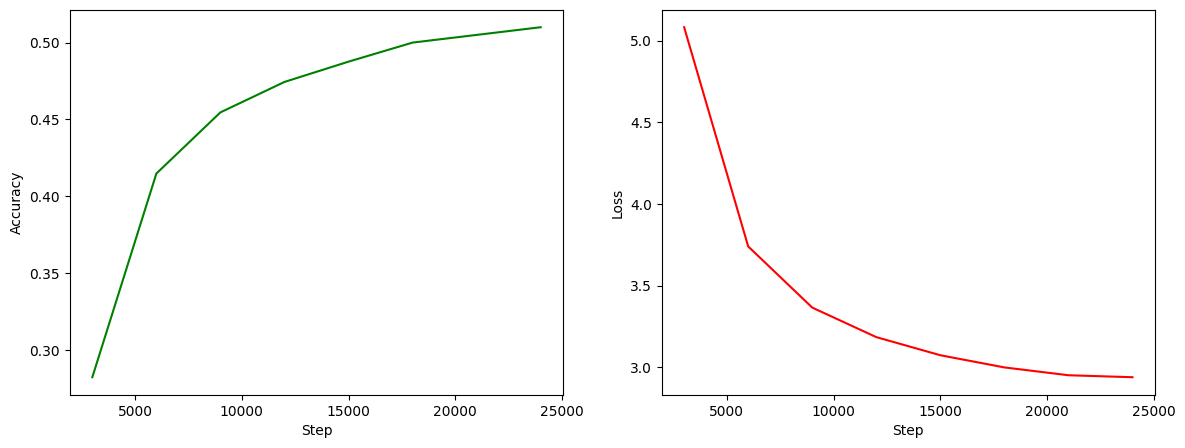

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

a = [3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000]
b = [0.2823, 0.4148, 0.4546, 0.4744, 0.4876, 0.5, 0.505, 0.51]

l = [5.082, 3.7404, 3.3662, 3.1854, 3.0746, 3.0, 2.9521, 2.94]

axes[0].plot(a, b, color='green')
axes[1].plot(a, l, color='red')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Accuracy')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')
plt.show()